Final Project

Student Name: Bobbin Okeyo Bodo
Student pace: Hybrid 
Schedule project review date/time:
Instructor name: Mwikali


Projet Overview: 

I am cleaning, imputating, analyzing and vizualizing data to generate insights for a business stakeholder.

Data:

The dataset National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

Business Objectives:

Get to understand the data so as to help my company expand into new industries to diversify its portfolio. Our company is interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [360]:
AviationData = pd.read_csv('Aviation_Data.csv')
AviationData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [361]:
# Test to ensure the data is loaded correctly

assert type(AviationData) == pd.DataFrame

Getting information of data set

In [362]:
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Getting a descriptive statistics of our numerical dataframe coluumns

In [363]:
AviationData.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


CLEANING DATA

In [364]:
# Droping duplicate rows if any found under specific columns, namely 'Event.Id', 'Investigation.Type', and 'Accident.Number'

AviationData.drop_duplicates(subset=['Event.Id', 'Investigation.Type', 'Accident.Number'], inplace=True)
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88932 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88863 non-null  object 
 1   Investigation.Type      88932 non-null  object 
 2   Accident.Number         88863 non-null  object 
 3   Event.Date              88863 non-null  object 
 4   Location                88811 non-null  object 
 5   Country                 88637 non-null  object 
 6   Latitude                34363 non-null  object 
 7   Longitude               34354 non-null  object 
 8   Airport.Code            50233 non-null  object 
 9   Airport.Name            52774 non-null  object 
 10  Injury.Severity         87873 non-null  object 
 11  Aircraft.damage         85678 non-null  object 
 12  Aircraft.Category       32263 non-null  object 
 13  Registration.Number     87546 non-null  object 
 14  Make                    88800 non-null

In [365]:
# Dropping columns that are not necessary for analysis

AviationData = AviationData.drop(['Investigation.Type', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Publication.Date', 'Schedule', 'Registration.Number', 'Air.carrier', 'FAR.Description', 'Purpose.of.flight', 'Broad.phase.of.flight'] , axis=1)
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88932 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88863 non-null  object 
 1   Accident.Number         88863 non-null  object 
 2   Event.Date              88863 non-null  object 
 3   Location                88811 non-null  object 
 4   Country                 88637 non-null  object 
 5   Injury.Severity         87873 non-null  object 
 6   Aircraft.damage         85678 non-null  object 
 7   Aircraft.Category       32263 non-null  object 
 8   Make                    88800 non-null  object 
 9   Model                   88771 non-null  object 
 10  Amateur.Built           88761 non-null  object 
 11  Number.of.Engines       82789 non-null  float64
 12  Engine.Type             81806 non-null  object 
 13  Total.Fatal.Injuries    77462 non-null  float64
 14  Total.Serious.Injuries  76353 non-null

In [366]:
# Dropping rows with missing values in critical columns

AviationData = AviationData.dropna(subset=['Make', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74283 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                74283 non-null  object 
 1   Accident.Number         74283 non-null  object 
 2   Event.Date              74283 non-null  object 
 3   Location                74251 non-null  object 
 4   Country                 74071 non-null  object 
 5   Injury.Severity         73310 non-null  object 
 6   Aircraft.damage         71640 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    74283 non-null  object 
 9   Model                   74244 non-null  object 
 10  Amateur.Built           74282 non-null  object 
 11  Number.of.Engines       69609 non-null  float64
 12  Engine.Type             68703 non-null  object 
 13  Total.Fatal.Injuries    74283 non-null  float64
 14  Total.Serious.Injuries  74283 non-null

In [367]:
# Converting data types of certain columns for better analysis

AviationData['Total.Fatal.Injuries'] = AviationData['Total.Fatal.Injuries'].astype(int)
AviationData['Total.Serious.Injuries'] = AviationData['Total.Serious.Injuries'].astype(int)
AviationData['Total.Minor.Injuries'] = AviationData['Total.Minor.Injuries'].astype(int)
AviationData['Total.Uninjured'] = AviationData['Total.Uninjured'].astype(int)
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74283 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                74283 non-null  object 
 1   Accident.Number         74283 non-null  object 
 2   Event.Date              74283 non-null  object 
 3   Location                74251 non-null  object 
 4   Country                 74071 non-null  object 
 5   Injury.Severity         73310 non-null  object 
 6   Aircraft.damage         71640 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    74283 non-null  object 
 9   Model                   74244 non-null  object 
 10  Amateur.Built           74282 non-null  object 
 11  Number.of.Engines       69609 non-null  float64
 12  Engine.Type             68703 non-null  object 
 13  Total.Fatal.Injuries    74283 non-null  int32  
 14  Total.Serious.Injuries  74283 non-null

Drop missing values under Aircraft category

In [368]:
AviationData = AviationData.dropna(subset=['Aircraft.Category'])
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28184 entries, 7 to 90345
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                28184 non-null  object 
 1   Accident.Number         28184 non-null  object 
 2   Event.Date              28184 non-null  object 
 3   Location                28184 non-null  object 
 4   Country                 28174 non-null  object 
 5   Injury.Severity         27308 non-null  object 
 6   Aircraft.damage         26845 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    28184 non-null  object 
 9   Model                   28161 non-null  object 
 10  Amateur.Built           28183 non-null  object 
 11  Number.of.Engines       25067 non-null  float64
 12  Engine.Type             22980 non-null  object 
 13  Total.Fatal.Injuries    28184 non-null  int32  
 14  Total.Serious.Injuries  28184 non-null

Filling mising values of categories

In [369]:
Total_Fatal_Injuries_mean = AviationData['Total.Fatal.Injuries'].fillna(0).mean()
AviationData['Total.Fatal.Injuries'] = AviationData['Total.Fatal.Injuries'].fillna(Total_Fatal_Injuries_mean)
Total_Serious_Injuries_mean = AviationData['Total.Serious.Injuries'].fillna(0).mean()
AviationData['Total.Serious.Injuries'] = AviationData['Total.Serious.Injuries'].fillna(Total_Serious_Injuries_mean)
Total_Minor_Injuries_mean = AviationData['Total.Minor.Injuries'].fillna(0).mean()
AviationData['Total.Minor.Injuries'] = AviationData['Total.Minor.Injuries'].fillna(0)
Total_Uninjured_mean = AviationData['Total.Uninjured'].fillna(0).mean()
AviationData['Total.Uninjured'] = AviationData['Total.Uninjured'].fillna(Total_Uninjured_mean)
Location_mode = AviationData['Location'].fillna(0).mode()
AviationData['Location'] = AviationData['Location'].fillna(Location_mode[0])
Injury_Severity_mode = AviationData['Injury.Severity'].fillna(0).mode()
AviationData['Injury.Severity'] = AviationData['Injury.Severity'].fillna(Injury_Severity_mode[0])
Aircraft_Damage_mode = AviationData['Aircraft.damage'].fillna(0).mode()
AviationData['Aircraft.damage'] = AviationData['Aircraft.damage'].fillna(Aircraft_Damage_mode[0])
Make_mode = AviationData['Make'].fillna(0).mode()
AviationData['Make'] = AviationData['Make'].fillna(Make_mode[0])
Model_mode = AviationData['Model'].fillna(0).mode()
AviationData['Model'] = AviationData['Model'].fillna(Model_mode[0])
Amateur_Built_mode = AviationData['Amateur.Built'].fillna(0).mode()
AviationData['Amateur.Built'] = AviationData['Amateur.Built'].fillna(Amateur_Built_mode[0])
Number_of_Engines_mode = AviationData['Number.of.Engines'].fillna(0).mode()
AviationData['Number.of.Engines'] = AviationData['Number.of.Engines'].fillna(Number_of_Engines_mode[0])
Engine_Type_mode = AviationData['Engine.Type'].fillna(0).mode()
AviationData['Engine.Type'] = AviationData['Engine.Type'].fillna(Engine_Type_mode[0])
Weather_Condition_mode = AviationData['Weather.Condition'].fillna(0).mode()
AviationData['Weather.Condition'] = AviationData['Weather.Condition'].fillna(Weather_Condition_mode[0])
Report_Status_mode = AviationData['Report.Status'].fillna(0).mode()
AviationData['Report.Status'] = AviationData['Report.Status'].fillna(Report_Status_mode[0])
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28184 entries, 7 to 90345
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                28184 non-null  object 
 1   Accident.Number         28184 non-null  object 
 2   Event.Date              28184 non-null  object 
 3   Location                28184 non-null  object 
 4   Country                 28174 non-null  object 
 5   Injury.Severity         28184 non-null  object 
 6   Aircraft.damage         28184 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    28184 non-null  object 
 9   Model                   28184 non-null  object 
 10  Amateur.Built           28184 non-null  object 
 11  Number.of.Engines       28184 non-null  float64
 12  Engine.Type             28184 non-null  object 
 13  Total.Fatal.Injuries    28184 non-null  int32  
 14  Total.Serious.Injuries  28184 non-null

Statistical description of my data after cleaning

In [370]:
AviationData.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000
mean,1.119997,0.553683,0.292258,0.208806,5.316882
std,0.400571,4.853087,1.962803,0.868295,28.038031
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,295.000000,161.000000,50.000000,576.000000


Sort according to fatilities in descending order

In [371]:
AviationData = AviationData.sort_values(by='Total.Fatal.Injuries', ascending=False)
AviationData = AviationData.reset_index(drop=True)
AviationData.head(5)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20140718X92314,DCA14RA127,2014-07-17,"Hrabove, Ukraine",Ukraine,Fatal,Destroyed,Airplane,BOEING,777 - 206,No,1.0,Reciprocating,295,0,0,0,VMC,0
1,20140308X91420,DCA14RA076,2014-03-08,"Kuala Lampur, Malaysia",Malaysia,Fatal,Destroyed,Airplane,BOEING,777 - 206,No,1.0,Reciprocating,239,0,0,0,VMC,0
2,20090601X72555,DCA09RA052,2009-06-01,"Atlantic, France",France,Fatal,Destroyed,Airplane,AIRBUS,A330,No,2.0,Reciprocating,228,0,0,0,VMC,.
3,20151102X00423,DCA16WA015,2015-10-31,"Sinai Peninsula, Egypt",Egypt,Fatal,Destroyed,Airplane,AIRBUS,A321,No,1.0,Reciprocating,224,0,0,0,VMC,0
4,20181029X04746,DCA19RA017,2018-10-29,"Jakarta, Indonesia",Indonesia,Fatal,Destroyed,Airplane,BOEING,737,No,1.0,Reciprocating,188,0,0,0,VMC,0


In [372]:
# Bottom 5 records with least fatal injuries

AviationData.tail(5)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
28179,20110903X53441,WPR11FA426,2011-09-03,"Heber City, UT",United States,Non-Fatal,Substantial,Helicopter,ENSTROM,280FX,No,1.0,Reciprocating,0,0,3,0,VMC,The pilots failure to ensure that there was s...
28180,20110903X50008,WPR11CA425,2011-09-03,"Gerlach, NV",United States,Non-Fatal,Substantial,Airplane,PIPER,PA-28-180,No,1.0,Reciprocating,0,1,0,1,VMC,The pilots decision to land at an unknown off...
28181,20110906X05214,CEN11LA618,2011-09-02,"Marion, IL",United States,Non-Fatal,Substantial,Airplane,Vicari,Waiex,Yes,1.0,Reciprocating,0,0,0,1,VMC,The partial loss of engine power during initia...
28182,20110903X41910,WPR11FA424,2011-09-02,"Lakeport, CA",United States,Non-Fatal,Substantial,Airplane,CONSOLIDATED AERONAUTICS INC.,LAKE LA-4-200,No,1.0,Reciprocating,0,0,1,0,VMC,The pilot's decision to continue the takeoff w...
28183,20221227106497,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Reciprocating,0,0,0,1,VMC,0


Creating an analysis filtering columns and grouping columns

In [373]:
metrics = AviationData.groupby('Make').agg(
    total_incidents=('Make', 'size'),
    total_aircraft_category=('Aircraft.Category', 'sum'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum'),
    total_serious_injuries=('Total.Serious.Injuries', 'sum'),

    total_minor_injuries=('Total.Minor.Injuries', 'sum'),
    total_uninjured=('Total.Uninjured', 'sum')
).reset_index()
metrics.head()
metrics = AviationData.groupby('Model').agg(
    total_incidents=('Model', 'size'),
    total_aircraft_category=('Aircraft.Category', 'sum'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum'),
    total_serious_injuries=('Total.Serious.Injuries', 'sum'),

    total_minor_injuries=('Total.Minor.Injuries', 'sum'),
    total_uninjured=('Total.Uninjured', 'sum')
).reset_index()
metrics.head()
metrics = metrics.sort_values(by='total_fatal_injuries', ascending=False)
metrics = metrics.reset_index(drop=True)
metrics.head(10)
metrics = metrics.sort_values(by='total_fatal_injuries', ascending=True)
metrics = metrics.reset_index(drop=True)
metrics.head(10)
metrics.tail(10)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
5958,A310,1,Airplane,152,0,1,0
5959,MD-82,4,AirplaneAirplaneAirplaneAirplane,154,0,18,137
5960,A320 - 216,1,Airplane,162,0,0,0
5961,A320,80,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,170,11,13,3358
5962,R44,289,HelicopterHelicopterHelicopterHelicopterHelico...,211,92,78,222
5963,172,840,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,239,187,129,923
5964,A330,30,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,331,19,24,2770
5965,A321,20,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,381,0,2,1349
5966,777 - 206,3,AirplaneAirplaneAirplane,534,0,0,0
5967,737,400,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,1341,339,83,20390


In [374]:
metrics.describe()

,total_incidents,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,4.722520,2.614779,1.380194,0.986092,25.109082
std,19.323173,21.964806,7.379878,3.993959,313.749888
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,1.000000,4.000000
max,840.000000,1341.000000,339.000000,129.000000,20390.000000


Analysis

In [375]:
# Checking models with highest number of incidents

metrics = metrics.sort_values(by='total_incidents', ascending=False)
metrics = metrics.reset_index(drop=True)
metrics.head(10)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
0,172,840,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,239,187,129,923
1,737,400,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,1341,339,83,20390
2,152,370,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,59,45,30,374
3,182,316,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,147,88,58,332
4,R44,289,HelicopterHelicopterHelicopterHelicopterHelico...,211,92,78,222
5,PA28,273,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,116,66,48,262
6,SR22,250,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,145,67,40,246
7,172N,240,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,95,60,34,274
8,150,237,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,65,31,54,194
9,180,205,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,22,35,21,302


In [376]:
# Checking models with least number of incidents

metrics = metrics.sort_values(by='total_incidents', ascending=False)
metrics = metrics.reset_index(drop=True)
metrics.tail(10)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
5958,APT70,1,Helicopter,0,0,0,0
5959,ASW 20B,1,Glider,0,0,1,0
5960,ASW 24,1,Glider,0,0,1,0
5961,AVID C AEROBAT,1,Airplane,0,0,1,0
5962,AVID AMPHIBIAN,1,Airplane,0,2,0,0
5963,APOLLO AG-1,1,Gyrocraft,0,1,0,0
5964,AR-58,1,Airplane,0,1,1,0
5965,AS-350 BA,1,Helicopter,0,0,0,2
5966,AS-105-GD,1,Blimp,0,0,1,0
5967,SUPER CHIEF,1,Airplane,0,0,0,1


In [377]:
# Checking highest fatality rate by models

metrics['fatality_rate'] = metrics['total_fatal_injuries'] / metrics['total_incidents']
metrics = metrics.sort_values(by='fatality_rate', ascending=False)
metrics.head(10)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
1500,777 - 206,3,AirplaneAirplaneAirplane,534,0,0,0,178.0
4914,A320 - 216,1,Airplane,162,0,0,0,162.0
4643,A310,1,Airplane,152,0,1,0,152.0
4686,TU154,1,Airplane,89,0,0,0,89.0
4774,AN148,1,Airplane,71,0,0,0,71.0
1430,A320-211,3,AirplaneAirplaneAirplane,150,0,0,140,50.0
4369,737 - 500,1,Airplane,50,0,0,0,50.0
4414,SJ100,1,Airplane,44,0,0,0,44.0
2192,737-500,2,AirplaneAirplane,88,0,0,39,44.0
5534,72,1,Airplane,43,1,14,0,43.0


In [378]:
# Check model with lowest fatality rate

metrics['fatality_rate'] = metrics.sort_values(by='fatality_rate', ascending=True)
metrics.tail(10)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
2877,4-D,1,Airplane,0,0,0,1,4-D
2875,415-G,1,Airplane,0,1,1,0,415-G
2868,227C,1,Airplane,0,0,0,4,227C
2874,415D,1,Airplane,0,0,0,1,415D
2873,427,1,Helicopter,0,5,0,0,427
2872,45XR,1,Airplane,0,1,0,1,45XR
2871,415-CD,1,Airplane,0,0,0,1,415-CD
2870,3NM,1,Airplane,0,3,0,0,3NM
2869,319,1,Airplane,0,11,0,77,319
5967,SUPER CHIEF,1,Airplane,0,0,0,1,SUPER CHIEF


In [379]:
# Check models with highest fatalities

metrics = metrics.sort_values(by='total_fatal_injuries', ascending=False)
metrics.head(10)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
1,737,400,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,1341,339,83,20390,737
1500,777 - 206,3,AirplaneAirplaneAirplane,534,0,0,0,777 - 206
245,A321,20,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,381,0,2,1349,A321
147,A330,30,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,331,19,24,2770,A330
0,172,840,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,239,187,129,923,172
4,R44,289,HelicopterHelicopterHelicopterHelicopterHelico...,211,92,78,222,R44
39,A320,80,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,170,11,13,3358,A320
4914,A320 - 216,1,Airplane,162,0,0,0,A320 - 216
1015,MD-82,4,AirplaneAirplaneAirplaneAirplane,154,0,18,137,MD-82
4643,A310,1,Airplane,152,0,1,0,A310


In [394]:
# Check models with lowest fatalities

metrics = metrics.sort_values(by='total_fatal_injuries', ascending=False)
metrics.tail(50)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
5170,STEEN,1,Airplane,0,0,0,2,STEEN
5171,STINSON 108,1,Airplane,0,0,0,1,STINSON 108
5172,Spitfire,1,Airplane,0,0,0,1,Spitfire
5204,SR,1,Airplane,0,0,0,3,SR
5205,SQ2,1,Airplane,0,0,0,2,SQ2
5206,SQ-2,1,Airplane,0,0,1,1,SQ-2
5147,DELTA JET-II,1,Weight-Shift,0,1,0,1,DELTA JET-II
5148,DC9-30,1,Airplane,0,0,0,51,DC9-30
5239,CRJ700,1,Airplane,0,0,0,0,CRJ700
5240,Carat A,1,Glider,0,0,1,0,Carat A


Visualization

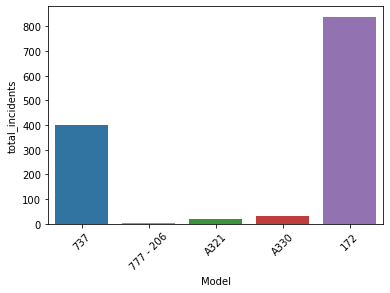

In [ ]:
# Top 10 Aircrafts models by total incidents 

bar = sns.barplot(x='Model', y='total_incidents', data=metrics.head(5))
plt.xticks(rotation=45)
plt.show()

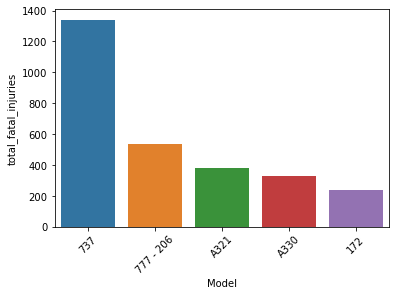

In [ ]:
# Top 10 Aircrafts models by total fatalities

bar = sns.barplot(x='Model', y='total_fatal_injuries', data=metrics.head(5))
plt.xticks(rotation=45)
plt.show()

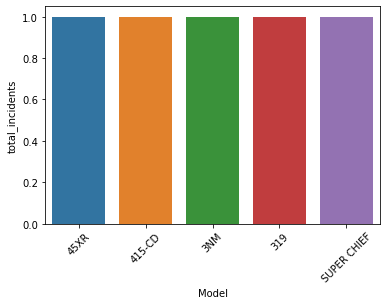

In [389]:
# Models with least number of incidents

bar = sns.barplot(x='Model', y='total_incidents', data=metrics.tail(5))
plt.xticks(rotation=45) 
plt.show()



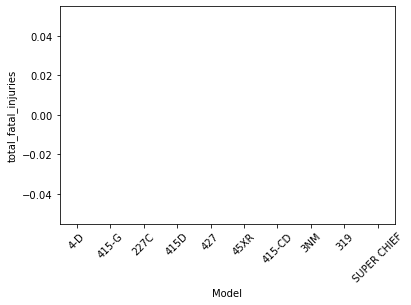

In [391]:
# Models with least number of fatalities

bar = sns.barplot(x='Model', y='total_fatal_injuries', data=metrics.tail(10))
plt.xticks(rotation=45)
plt.show()

In [386]:
AviationData.to_csv('Cleaned_Aviation_Data.csv')

Recommendations

